### Thallys Oliveira - 11819827

Questão 3 - Lista 3

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

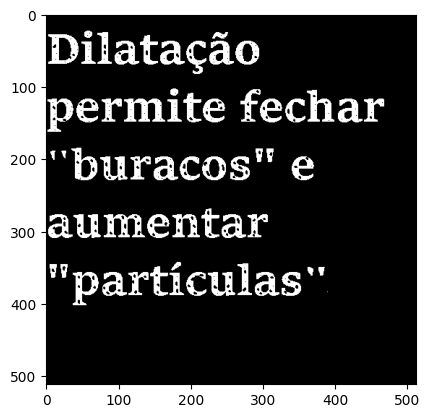

In [59]:
local_img = "/home/thallys/Documentos/Graduação/Visão Computacional/Visao_computacional/Lista 3 /Arquivos/texto.png"
img_texto = cv.imread(local_img)
plt.imshow(img_texto)

In [60]:
# Criação dos Elementos Estruturantes

elem_estru = np.array([[1,0,1],[0,1,0],[1,0,1]], np.uint8)      
elem_retan = cv.getStructuringElement(cv.MORPH_RECT, (5,5))       # Retangulo de tamanho 5x5
elem_cross = cv.getStructuringElement(cv.MORPH_CROSS, (7,7))      # Cross de tamanho 7x7
elem_elipse = cv.getStructuringElement( cv.MORPH_ELLIPSE,(11,11)) # Elipse de tamanho 11x11

# Realizando a Dilatação

dilate_estru  = cv.dilate(img_texto, elem_estru, iterations = 1)
dilate_retan  = cv.dilate(img_texto, elem_retan, iterations = 1)
dilate_cross  = cv.dilate(img_texto, elem_cross, iterations = 1)
dilate_elipse = cv.dilate(img_texto, elem_elipse, iterations = 1)

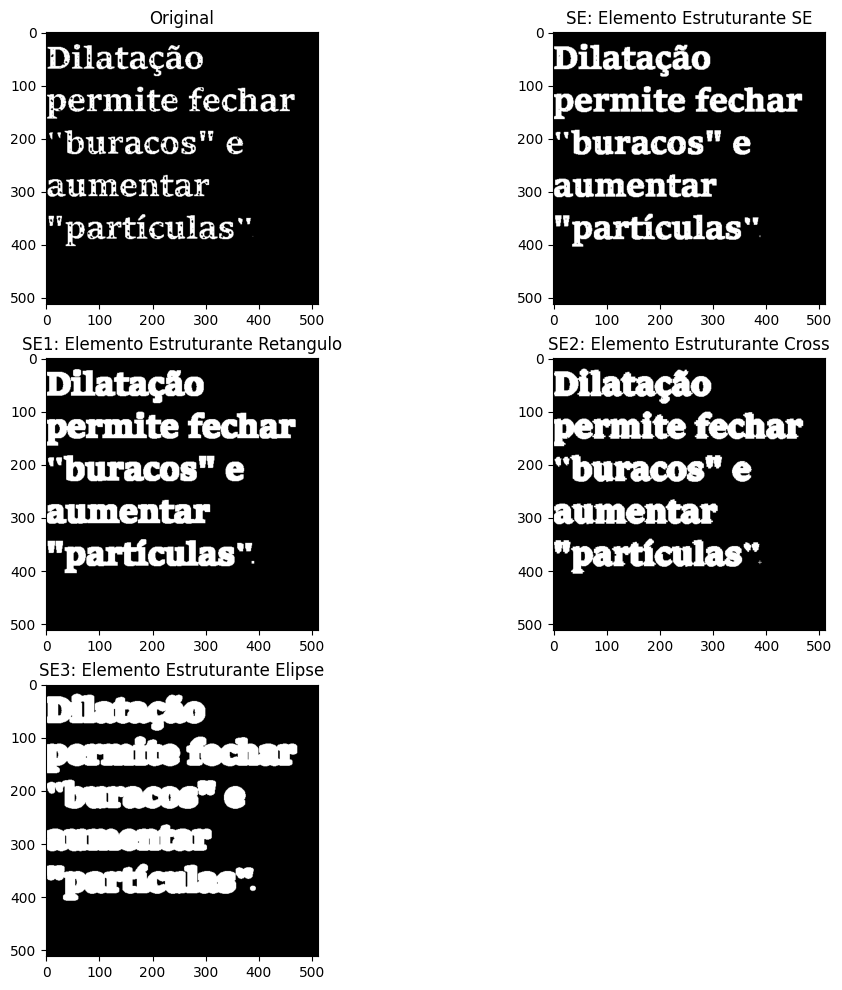

In [61]:
# Plotando as Imagens

plt.figure(figsize = (12,12))
plt.subplot(3,2,1)
plt.title("Original")
plt.imshow(img_texto)

plt.subplot(3,2,2)
plt.imshow(dilate_estru)
plt.title("SE: Elemento Estruturante SE")

plt.subplot(3,2,3)
plt.imshow(dilate_retan)
plt.title("SE1: Elemento Estruturante Retangulo")

plt.subplot(3,2,4)
plt.imshow(dilate_cross)
plt.title("SE2: Elemento Estruturante Cross")

plt.subplot(3,2,5)
plt.imshow(dilate_elipse)
plt.title("SE3: Elemento Estruturante Elipse")

plt.show()

### Comentários:

Analisando os resultados acima, percebemos que pelo processo de dilatação com os elementos estruturantes SE, Retângulo, Cross e Elipse, ocorre o engrossamento da imagem do texto, o que nós traz maior nitidez nas imagens SE e SE1, mas nas imagens SE2 e SE3, o processo de engrossamento foi muito elevado, o que nós dá a impressão de um texto borrado. Isto ocorreu porque o processo de dilatação por meio dos elementos estruturante que pŕe definimos, a medida que aumentamos o tamanho da matriz do elemento estruturante, os pixels do texto da imagem sofreram uma dilatação cada vez mais elevada, conectando as letras e deixando-as com aspecto borrado. 

In [62]:
# Elemento Estruturante Eliptico 5x5
elem_elipse = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

# Realizando a Erosão com o SE1
erosao_retan = cv.erode(dilate_retan, elem_elipse, iterations = 1)

# Subtraindo a imagem original da erosão
img_resul = np.bitwise_and(dilate_retan,~erosao_retan)

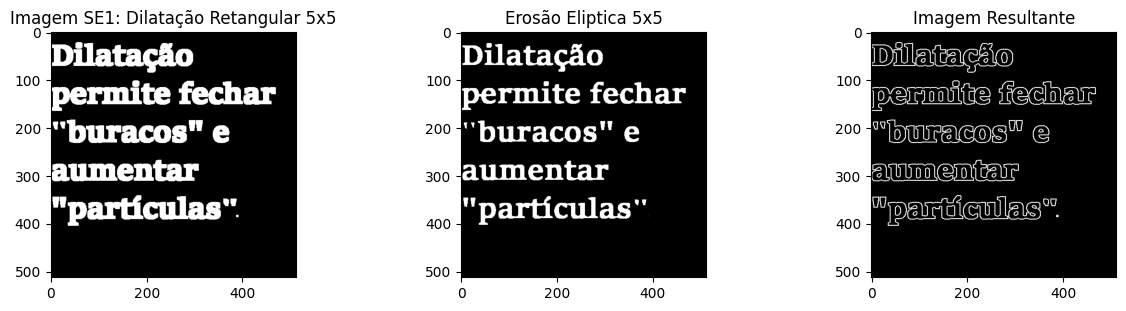

In [63]:
# Plotando Imagens
plt.figure(figsize=(15, 7)) 

plt.subplot(2,3,1)
plt.imshow(dilate_retan, cmap='gray')
plt.title('Imagem SE1: Dilatação Retangular 5x5')

plt.subplot(2,3,2)
plt.imshow(erosao_retan, cmap='gray')
plt.title('Erosão Eliptica 5x5')

plt.subplot(2,3,3)
plt.imshow(img_resul, cmap='gray')
plt.title('Imagem Resultante')

plt.show()

### Comentários:

Na primeira imagem, temos a imagem dilatada, na qual aplicamos uma erosa, o que resulta na diminuição da grossura da letra. Entretanto, devido a mudança da forma do elemento estruturante, de um retangulo para uma elipse, o que na prática resulta na diminuição do tamanho do elemento, visto que um retangulo ocupa mais espaço que uma elipse, quando de mesmo tamanho. Assim, quando subtraimos uma da outra, obtemos a imagem resultante, que é o "contorno do texto". 